# Neural Network In-Class Exercises

These are the in-class exercises accompanying the Neural networks unit.  Do these exercises as you progress through the sections in the lecture.

In [71]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Consider a neural network where, for each scalar input `x`, it outputs a predicted value `yhat` as follows:

    zh = wh*x + bh
    uh = 1/(1 + exp(-zh))   # Sigmoid activation
    zo = uh.dot(wo) + bo
    yhat = zo               # No activation

Using the parameter values below, for scalar inputs `x` in the range of -4 to 8:

*  Plot `uh` vs `x`.  Since there are three hidden units, your graph should have three curves
*  Plot `yhat` vs `x`.  Since there is one output unit, your graph should have one curve

In [72]:
x = np.linspace(-4,8,100)
wh = np.array([1,1,1])
bh = -np.array([0,2,4])
wo = np.array([1,-2,0.5])
bo = 0.1

# TODO
#   uh = ...
#   yhat = ...

## Exercise 2

We will now try to a similar neural network to fit a simple nonlinear function. Suppose that we are trying to learn a scalar relation:

    y = f0(x)
    
where `x` and `y` are scalars. Suppose that the true function is `f0(x) = sin(2*pi*x)`, but the estimator does not know this. We get training data as follows.  First plot the training data `xtr`, `ytr`, below.

In [73]:
ntr = 100
xtr = np.random.rand(ntr)
ytr = np.sin(2*np.pi*xtr) + np.random.normal(0,0.1,ntr)

# TODO
# plt.plot(...)



To learn the function, consider a neural network with the same structure as before:

    zh = wh*x + bh
    uh = 1/(1 + exp(-zh))   # Sigmoid activation
    yhat = uh.dot(wo) + bo  # No activation
    
As we progress through the unit, we will show how to fit the parameters for the network in both the hidden and output layers.  But, to give you an idea of the training, in this exercise, we will fit just the output weights and biases, `wh` and `bh`,  with the hidden weights and biases, `wo` and `bo`, fixed.  

For the given parameters in the hidden layer, complete the function `hidden()` below that maps a vector of inputs `x` to produce the matrix of hidden outputs `uh`.  Compute the value of `uh_tr = hidden(xtr,wh,bh)` which is the value of the hidden unit outputs on the training data.

In [74]:
nhid = 4
wh = np.ones(nhid)
bh = -np.linspace(0,1,nhid)

def hidden(x,wh,bh):
    # TODO
    return uh

# TODO
#   uh_tr = hidden(...)

To fit the parameters for the output layer, we want to find the weights and biases, `wo` and `bo`, such that

    ytr ~= uh_tr.dot(wo) + bo

We can do this with linear regression:

*  Create a `LinearRegression` object `reg`.  
*  Fit a linear model with `uh_tr` and `ytr`.  
*  Get the coefficients `wo` and `bo` from `reg.coef_` and `reg.intercept_`
*  Plot the predictions of the model on `xts` given below.  On the same plot, plot the training data.

In [75]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Test points
xts      = np.linspace(0,1,100)
yts_true = np.sin(2*np.pi*xts)  # f0(xts)

# TODO

## Exercise 3:  Training a Neural Network

Now we will try to train the neural network using tensorflow.   In the above example, I manually selected the hidden weights so that you can get a good fit.  But, when you have to train both the hidden and output weights, you will need a few more hidden units.  Train a neural network as follows:

* Clear the keras session
* Create a neural network with 32 hidden units, 1 output unit
* Use a sigmoid activation for the hidden layer and a `none` activation for the output layer
* Compile with `mean_squared_error` for the `loss` and `metrics`
* Fit the model.  You may need to play with the learning rate `lr` and you will probably need many `epochs`.
* Plot the predicted and true function

In [76]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.backend as K

K.clear_session()


# TODO

In [77]:
nin = 1 # dimension of input data
nh = 32 # number of hidden inputs
nout = 1 # number of output 
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation=None, name='output'))


In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 32)                64        
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


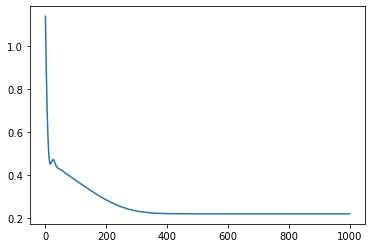

In [79]:
opt = optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])

hist = model.fit(xtr, ytr, epochs=1000, batch_size=100, verbose=0)

plt.plot(hist.history['loss'])



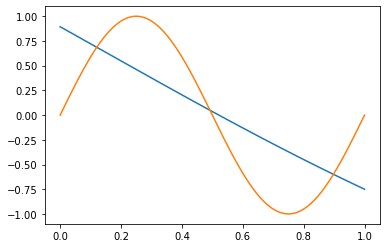

In [80]:
yhat = np.linspace(0, 1, 100)
yhat = model.predict(xts)
plt.plot(xts, yhat)
plt.plot(xts, yts_true)